<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [113]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, recall_score, f1_score
from sklearn.cluster import KMeans

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [55]:
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

# Nombres de las columnas alojados en el github
columnas = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
            "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Cargar el dataset
df = pd.read_csv(url, delim_whitespace=True, names=columnas)

# Número y nombre de los atributos
print("Número de atributos:", len(df.columns))
print("\nNombres de los atributos:")
print(df.columns.tolist())

# Número de filas
print("\nNúmero de filas del dataset:", df.shape[0])

# Valores faltantes (Tomando en cuenta que la documentación indica que no existen valores faltantes)
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Número de atributos: 14

Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Número de filas del dataset: 506

Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/tmp/ipython-input-738575245.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columnas)


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


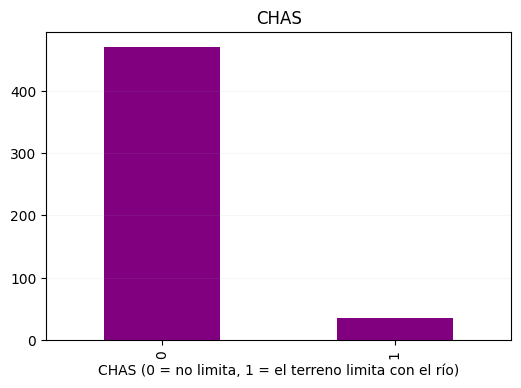

In [56]:
# Frecuencia de la variable CHAS
print("Frecuencia de CHAS:")
print(df["CHAS"].value_counts())

# Gráfico de barras
plt.figure(figsize=(6,4))
df["CHAS"].value_counts().plot(kind="bar", color=["purple"])
plt.title("CHAS")
plt.xlabel("CHAS (0 = no limita, 1 = el terreno limita con el río)")
plt.grid(axis="y", alpha=0.1)
plt.show()

In [57]:
numericas = df.drop(columns=["CHAS"])

print("Estadísticos descriptivos:")
print(numericas.describe())

print("\nMedianas:")
print(numericas.median())

print("\nDesviación estándar:")
print(numericas.std())

Estadísticos descriptivos:
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   


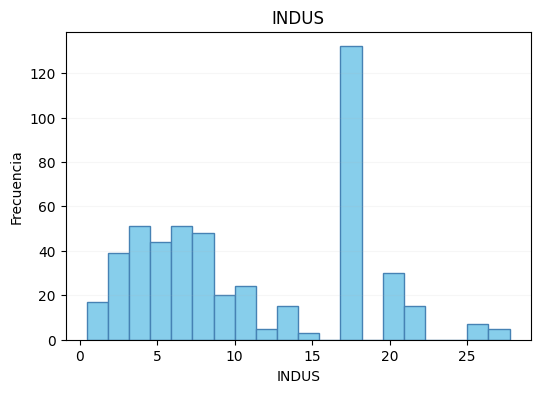

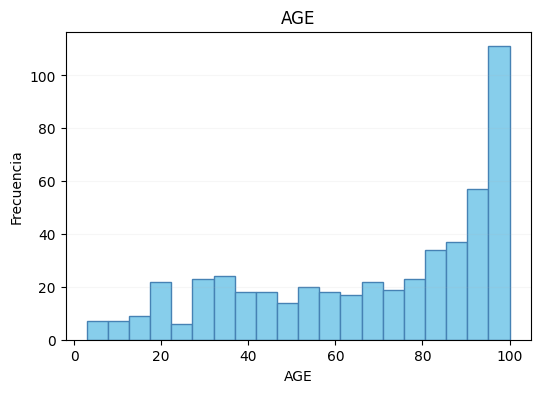

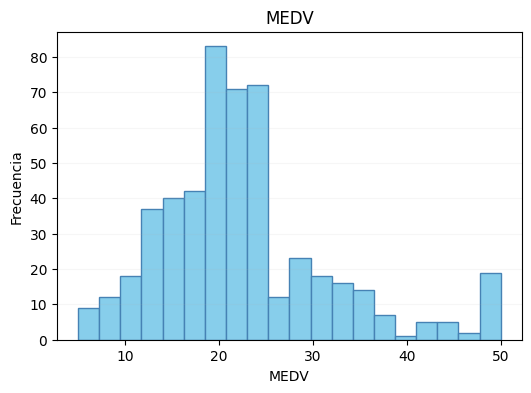

In [58]:
# Histogramas
variables_hist = ["INDUS", "AGE", "MEDV"]

for var in variables_hist:
    plt.figure(figsize=(6,4))
    plt.hist(df[var], bins=20, edgecolor="steelblue", color="skyblue")
    plt.title(f"{var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", alpha=0.1)
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>

**Variables categóricas:** *CHAS* \
Presenta una distribución desequilibrada, ya que aproximadamente el 93% de las viviendas no limitan con el río Charles, mientras que el 7% sí lo hace. Esto indica que estar junto al río es una condición poco común. Esta asimetría implica un conjunto de clases desbalanceado.

**Variables numéricas:** *CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV* \
Los estadísticos descriptivos muestran que muchas variables del dataset presentan distribuciones sesgadas, especialmente CRIM, ZN y LSTAT. La variable objetivo MEDV también muestra una distribución asimétrica, indicando que solo una pequeña proporción de zonas tiene viviendas con valores muy altos. Por lo tanto, hay presencia de outliers y distribuciones no simétricas.

**Historagramas:** *INDUS, AGE, MEDV* \
INDUS presenta una estructura multimodal que refleja diferencias entre zonas residenciales e industriales, AGE evidencia un parque inmobiliario mayoritariamente antiguo, mientras que MEDV exhibe una distribución sesgada hacia valores medios.
</div>

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

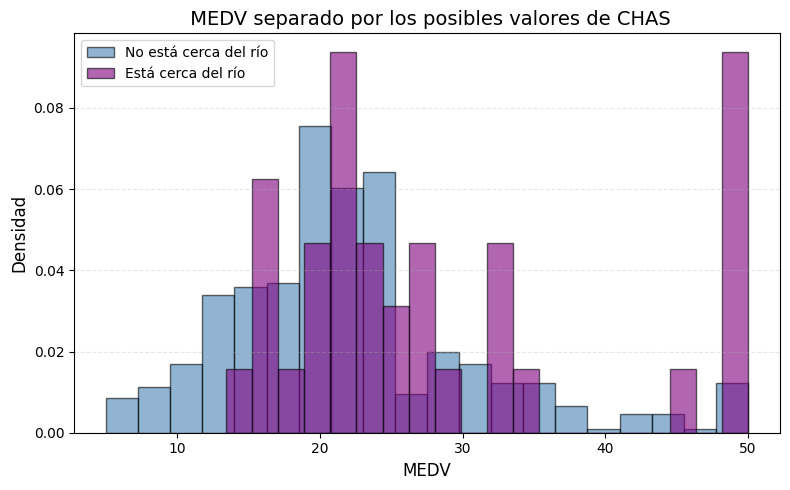

In [59]:
# Separar los datos según CHAS
noRio = df[df["CHAS"] == 0]["MEDV"]
siRio = df[df["CHAS"] == 1]["MEDV"]

plt.figure(figsize=(8,5))

# Histograma para viviendas que no están cerca del río
plt.hist(
    noRio,
    bins=20,
    density=True,
    alpha=0.6,
    color="steelblue",
    edgecolor="black",
    label="No está cerca del río")

# Histograma para viviendas que si están cerca del río
plt.hist(
    siRio,
    bins=20,
    density=True,
    alpha=0.6,
    color="purple",
    edgecolor="black",
    label="Está cerca del río")

# Título y etiquetas más humanas
plt.title(" MEDV separado por los posibles valores de CHAS", fontsize=14)
plt.xlabel("MEDV", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Sí, es probable que el atributo CHAS influya en la predicción de MEDV, porque al observar los histogramas se aprecia que las viviendas ubicadas cerca del río tienden a concentrarse en valores más altos de precio, incluso alcanzando con mayor frecuencia el valor máximo del dataset. En cambio, las viviendas que no colindan con el río presentan valores más bajos y una distribución más centrada en precios medios. Esto sugiere que la proximidad al río está asociada a un mayor valor inmobiliario, por lo que CHAS aporta información relevante para explicar las variaciones en el precio mediano de las viviendas.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [60]:
# Calcular correlación con MEDV
correlaciones = df.corr()["MEDV"].sort_values(ascending=False)
print("Correlación de cada atributo con MEDV:")
print(correlaciones)

Correlación de cada atributo con MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


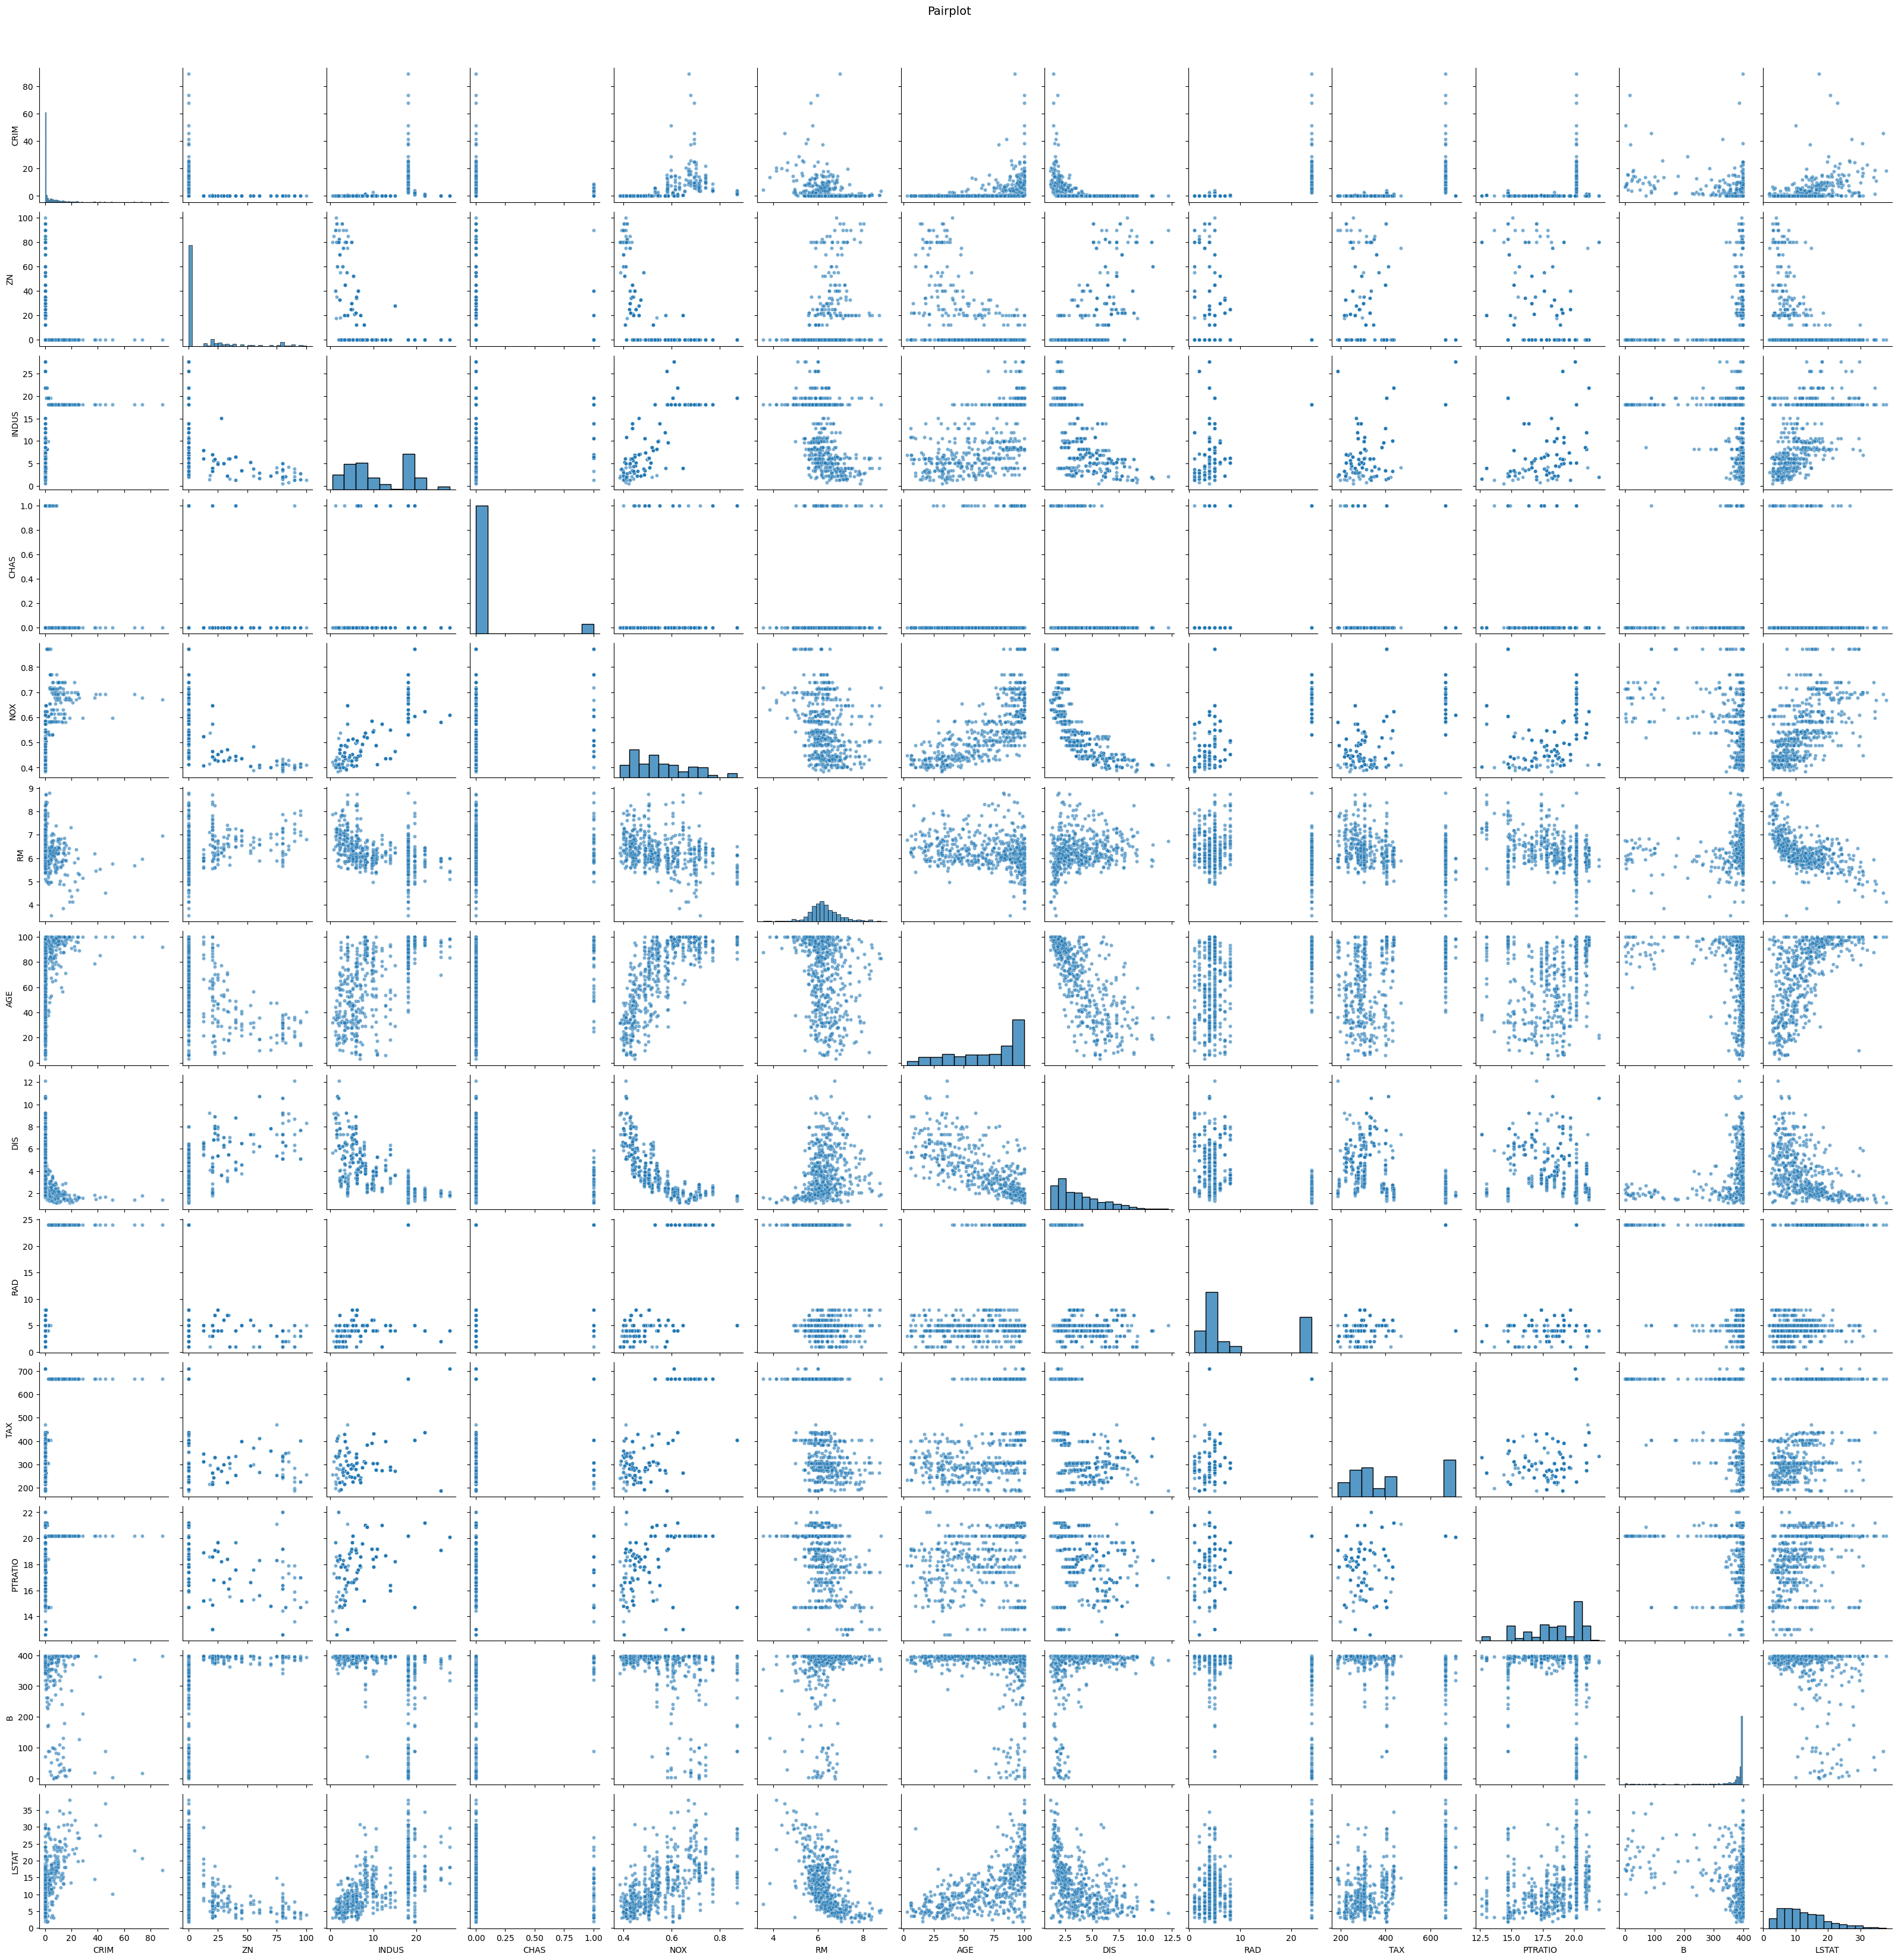

In [61]:
# Gráfico de variables sin MEDV
variablesNumericas = df.drop(columns=["MEDV"])
sns.pairplot(variablesNumericas, diag_kind="hist", plot_kws={"alpha":0.6, "s":20})
plt.suptitle("Pairplot", y=1.02, fontsize=14)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


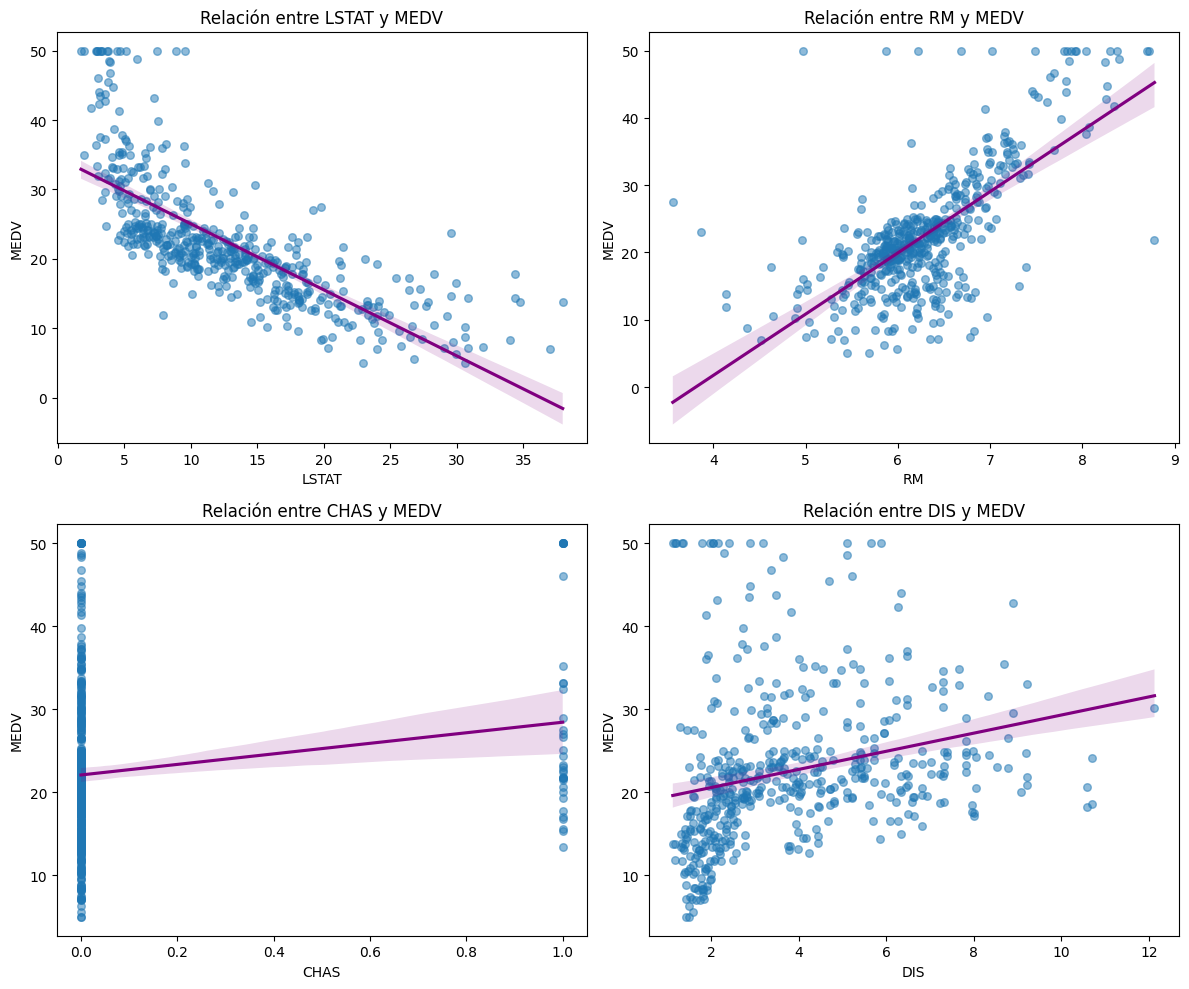

In [64]:
atributos = ["LSTAT", "RM", "CHAS", "DIS"]

plt.figure(figsize=(12,10))

for i, atr in enumerate(atributos, 1):
    plt.subplot(2, 2, i)
    sns.regplot(data=df,
                x=atr,
                y="MEDV",
                scatter_kws={"alpha":0.5, "s":30},
                line_kws={"color": "purple"})
    plt.title(f"Relación entre {atr} y MEDV")

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Sí, los gráficos permiten visualizar claramente las correlaciones identificadas numéricamente. En el caso de LSTAT, se observa una relación negativa muy marcada, ya que a medida que aumenta el porcentaje de población de bajo estatus el valor de la vivienda disminuye de forma casi lineal, lo que coincide con su correlación fuerte y negativa. De manera similar, RM muestra una tendencia positiva clara donde más habitaciones se asocian con precios más altos reflejando su correlación fuerte y positiva. En contraste, CHAS presenta una nube de puntos muy dispersa y una línea de regresión apenas inclinada, lo que confirma su correlación débil. Finalmente, DIS también muestra una relación tenue y con mucha variabilidad, indicando que su capacidad para explicar MEDV es limitada. En conjunto, las visualizaciones respaldan las correlaciones fuertes y débiles obtenidas numéricamente gracias a su inclinación y dispersión de los datos.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [84]:
# Separar variable objetivo
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

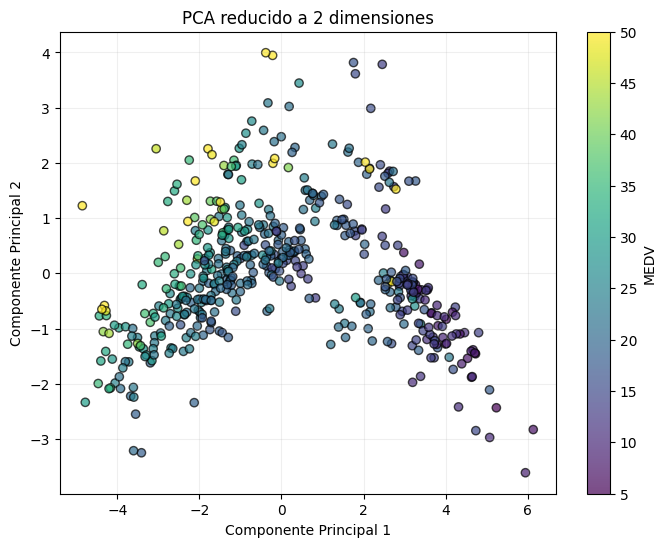

In [85]:
# Aplicación del PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(scatter, label="MEDV")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA reducido a 2 dimensiones")
plt.grid(alpha=0.2)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


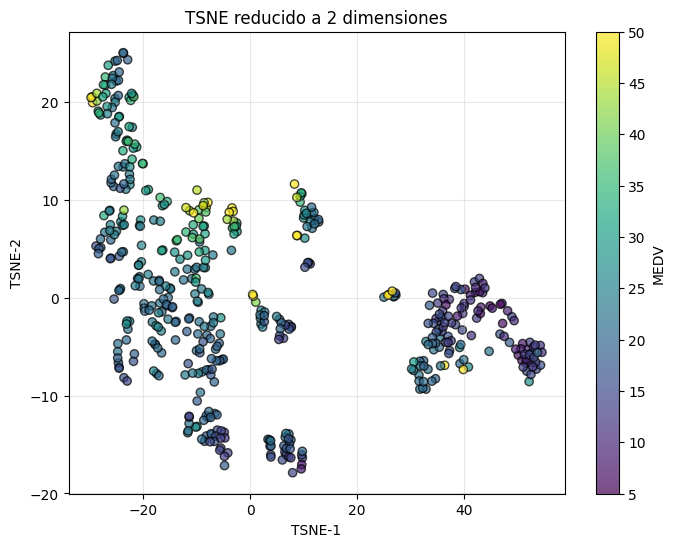

In [86]:
# Aplicación de TSNE
tsne = TSNE(
    n_components=2,
    perplexity=30,        # prueba valores 5–50
    learning_rate=200,    # puede ajustarse
    random_state=42)

X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0],
                      X_tsne[:,1],
                      c=y,
                      cmap="viridis",
                      alpha=0.7,
                      edgecolor="k")

plt.colorbar(scatter, label="MEDV")
plt.title("TSNE reducido a 2 dimensiones")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(alpha=0.3)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Al aplicar PCA la variación de MEDV no posee una separación clara entre viviendas de alto y bajo valor, esto ocurre porque PCA captura únicamente relaciones lineales. En cambio, TSNE revela agrupamientos mucho más definidos y permite distinguir mejor zonas donde predominan precios altos y bajos dando a entender que la estructura del dataset es mayormente no lineal.

Si se usaran estas dos nuevas dimensiones para predecir MEDV, el segundo método separaría con mayor claridad los diferentes rangos de precios. Las diferencias entre los métodos se deben a la naturaleza de cada uno, ya que PCA busca maximizar varianza global de manera lineal, mientras que TSNE preserva relaciones locales y patrones complejosq que producen una representación más discriminativa para este caso.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [101]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Dimensión de X_train:", X_train.shape)
print("Dimensión de X_test:", X_test.shape)
print("Dimensión de y_train:", y_train.shape)
print("Dimensión de y_test:", y_test.shape)

Dimensión de X_train: (404, 13)
Dimensión de X_test: (102, 13)
Dimensión de y_train: (404,)
Dimensión de y_test: (102,)


In [95]:
# Definir modelo
modelo = LinearRegression()

# Validación cruzada
r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring="r2")

print("R2 Scores:", r2)
print("R2 promedio:", r2.mean())
print("R2 desviación estándar:", r2.std())

R2 Scores: [0.62046964 0.72544544 0.78930049 0.59343058 0.78074794]
R2 promedio: 0.7018788172613141
R2 desviación estándar: 0.08100215624319278


In [105]:
# MAE
mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")

# Convertimos a valores positivos
mae = -mae

print("MAE Scores:", mae)
print("MAE promedio:", mae.mean())
print("MAE desviación estándar:", mae.std())

MAE Scores: [3.94970795 3.16295145 3.1078219  4.12617574 3.2127036 ]
MAE promedio: 3.511872126703184
MAE desviación estándar: 0.43441297744677687


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [102]:
# División de datos
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=5)

print("Dimensión de X_train_pca:", X_train_pca.shape)
print("Dimensión de X_test_pca:", X_test_pca.shape)

Dimensión de X_train_pca: (404, 2)
Dimensión de X_test_pca: (102, 2)


In [106]:
# Validación cruzada
r2_pca = cross_val_score(modelo, X_train_pca, y_train_pca, cv=5, scoring="r2")

print("R2 (PCA):", r2_pca)
print("R2 promedio (PCA):", r2_pca.mean())
print("R2 desviación estándar (PCA):", r2_pca.std())

R2 (PCA): [0.33394254 0.39435235 0.53977619 0.40834804 0.5057846 ]
R2 promedio (PCA): 0.436440744692778
R2 desviación estándar (PCA): 0.07556890823069241


In [109]:
mae_pca = cross_val_score(modelo, X_train_pca, y_train_pca, cv=5, scoring="neg_mean_absolute_error")

mae_pca = -mae_pca

print("MAE (PCA):", mae_pca)
print("MAE promedio (PCA):", mae_pca.mean())
print("MAE desviación estándar (PCA):", mae_pca.std())

MAE (PCA): [5.91442369 4.87645977 4.55024702 4.67024787 4.90605708]
MAE promedio (PCA): 4.983487087086927
MAE desviación estándar (PCA): 0.48371664876896275


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona mejor cuando se utilizan todos los atributos originales. Con los datos completos el R² promedio llega a 0.70, mientras que al usar solo las dos componentes del PCA baja a 0.44. Al analizar el MAE con las variables originales el error es menor, y al reducir el dataset a solo dos dimensiones el error aumenta de forma notable. Esto sucede porque al aplicar PCA se pierde parte de la información que estaba presente en las 13 variables originales y que el modelo necesita para predecir con mayor precisión. Además, este resultado coincide con lo observado en el ejercicio 3, donde PCA no logró separar tan claramente los distintos niveles de MEDV como lo hizo TSNE.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [112]:
# Ajustar el mejor modelo
modelo.fit(X_train, y_train)

# Generar predicciones sobre el conjunto de test
y_pred = modelo.predict(X_test)

# Calcular R2 y MAE
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("R2 en test:", r2_test)
print("MAE en test:", mae_test)

R2 en test: 0.7334492147453091
MAE en test: 3.2132704958423735


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Si tuviera que explicarle la calidad del modelo a un ejecutivo de una inmobiliaria, usaría MAE. Esta métrica es mucho más intuitiva porque expresa el error en las mismas unidades que el precio de las casas. En este caso, un MAE cercano a 3.21 significa que en promedio el modelo se equivoca alrededor de 3.2 miles de dólares por vivienda.

Si la explicación fuera para un analista matemático, utilizaría R². Esta métrica describe qué proporción de la variabilidad del precio de las viviendas es explicada por el modelo, y en este caso un valor de aproximadamente 0.73 indica que el modelo captura más del 70% de la variación de MEDV.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [117]:
# Separar CHAS como variable objetivo
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# K-means con dos grupos
kmeans = KMeans(n_clusters=2, random_state=5)
kmeans.fit(X_train_scaled)

# Predicción de los clusters en el set de test
clusters_test = kmeans.predict(X_test_scaled)
map1 = np.where(clusters_test == 0, 0, 1)
map2 = np.where(clusters_test == 0, 1, 0)

# Métricas del primer mapeo
acc1 = accuracy_score(y_test, map1)
rec1 = recall_score(y_test, map1)
f1_1 = f1_score(y_test, map1)

# Métricas del segundo mapeo
acc2 = accuracy_score(y_test, map2)
rec2 = recall_score(y_test, map2)
f1_2 = f1_score(y_test, map2)

print("Resultados del primer mapeo:")
print("  Accuracy:", acc1)
print("  Recall:", rec1)
print("  F1-score:", f1_1)

print("\nResultados del segundo mapeo:")
print("  Accuracy:", acc2)
print("  Recall:", rec2)
print("  F1-score:", f1_2)

# Comparar F1-score
if f1_1 >= f1_2:
    print("\nEl primer mapeo funciona mejor.")
    y_pred_final = map1
else:
    print("\nEl segundo mapeo funciona mejor.")
    y_pred_final = map2


Resultados del primer mapeo:
  Accuracy: 0.5294117647058824
  Recall: 0.14285714285714285
  F1-score: 0.04

Resultados del segundo mapeo:
  Accuracy: 0.47058823529411764
  Recall: 0.8571428571428571
  F1-score: 0.18181818181818182

El segundo mapeo funciona mejor.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [119]:
# Si aún no tienes el PCA hecho, aquí está:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(df.drop(columns=["CHAS"])))

# CHAS sigue siendo la variable objetivo
y = df["CHAS"]

# División en train y test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=5
)

# Escalar por si acaso (aunque PCA ya viene escalado normalmente)
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled  = scaler.transform(X_test_pca)

# K-means con 2 grupos
kmeans_pca = KMeans(n_clusters=2, random_state=5)
kmeans_pca.fit(X_train_pca_scaled)

# Predicción de clusters para el test
clusters_test_pca = kmeans_pca.predict(X_test_pca_scaled)

# Dos formas de asignar los clusters a las clases
map1 = np.where(clusters_test_pca == 0, 0, 1)
map2 = np.where(clusters_test_pca == 0, 1, 0)

# Métricas del primer mapeo
acc1_pca = accuracy_score(y_test_pca, map1)
rec1_pca = recall_score(y_test_pca, map1)
f1_1_pca = f1_score(y_test_pca, map1)

# Métricas del segundo mapeo
acc2_pca = accuracy_score(y_test_pca, map2)
rec2_pca = recall_score(y_test_pca, map2)
f1_2_pca = f1_score(y_test_pca, map2)

print("Primer mapeo:")
print("  Accuracy:", acc1_pca)
print("  Recall:", rec1_pca)
print("  F1-score:", f1_1_pca)

print("\nSegundo mapeo:")
print("  Accuracy:", acc2_pca)
print("  Recall:", rec2_pca)
print("  F1-score:", f1_2_pca)

# Selección del mejor
if f1_1_pca >= f1_2_pca:
    print("\nEl primer mapeo funciona mejor para el PCA.")
    y_pred_final_pca = map1
else:
    print("\nEl segundo mapeo funciona mejor para el PCA.")
    y_pred_final_pca = map2

Primer mapeo:
  Accuracy: 0.47058823529411764
  Recall: 0.2857142857142857
  F1-score: 0.06896551724137931

Segundo mapeo:
  Accuracy: 0.5294117647058824
  Recall: 0.7142857142857143
  F1-score: 0.1724137931034483

El segundo mapeo funciona mejor para el PCA.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo usaría la precisión porque indica qué proporción de predicciones fueron correctas y permite evaluar rápidamente si el modelo es de utilidad según cuánto acierta. Para un analista matemático es más adecuado el F1-score, ya que combina precisión y sensibilidad y ofrece una visión más equilibrada del desempeño en un problema desbalanceado como CHAS, donde la clase positiva es minoritaria.

Por otro lado, el modelo muestra un rendimiento bajo en general pero se observa que es ligeramente mejor discriminando que acertando. Esto quiere decir que identifica relativamente más casos positivos que los que clasifica correctamente en promedio. El modelo detecta mejor la presencia de la característica CHAS que su capacidad global de clasificar entre las dos categorías dado que es un método no supervisado.